In [1]:
import pandas as pd
import seaborn as sns
import plotly
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data/subscriptions.csv")

In [3]:
def is_active(row, month):
    started_before = row['Start Date (UTC)'] <= month.start_time
    ended_after = row['Canceled At (UTC)'] >= month.start_time or \
                  pd.isnull(row['Canceled At (UTC)'])
    
    return started_before and ended_after

In [4]:
# Convert relevant date columns to datetime
df['Start Date (UTC)'] = pd.to_datetime(df['Start Date (UTC)'])
df['Canceled At (UTC)'] = pd.to_datetime(df['Canceled At (UTC)'])

# Extract the month and year
df['start_month'] = df['Start Date (UTC)'].dt.to_period('M')
df['cancel_month'] = df['Canceled At (UTC)'].dt.to_period('M')


In [5]:
analysis_range = {
    "start": df['start_month'].min(),
    "end": df['start_month'].max()
}
# analysis_range
all_months = pd.period_range(analysis_range["start"], analysis_range["end"])
#all_months

In [6]:
start_hist = df.start_month.value_counts().sort_index()
first = pd.Series(index = [pd.to_datetime('2023-09').to_period('M')], data=[0])
cancel_hist = pd.concat([first, df.cancel_month.value_counts()]).sort_index()

In [7]:
actives = []
for month in start_hist.index:
    active_amount = df.apply(is_active, args=[month], axis=1)
    actives.append(active_amount.sum())

In [8]:
counts = pd.DataFrame({"idx": start_hist.index,
                       "start_count": start_hist.values,
                       "cancel_count": cancel_hist.values,
                       "actives":actives})

In [ ]:
counts['churn'] = (counts["cancel_count"] / counts["actives"])

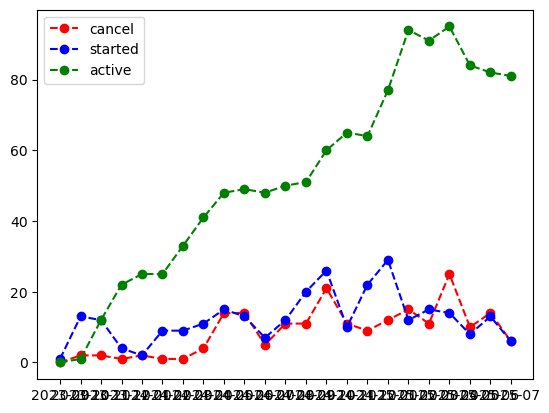

In [11]:
plt.plot(counts["idx"].astype(str),counts["cancel_count"], marker='o', linestyle='dashed',color = 'r', label="cancel")
plt.plot(counts["idx"].astype(str),counts["start_count"], marker='o', linestyle='dashed',color = 'b', label="started")
plt.plot(counts["idx"].astype(str),counts["actives"], marker='o', linestyle='dashed',color = 'g', label="active")
plt.legend()
# plt.xlabel("treatment_start_year")
# plt.ylabel("waiting_duration_weeks")
# plt.title("treatment_start_year X waiting_duration_weeks")
plt.show()